In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import wandb
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import make_moons

from modules.dataset import Dataset
from modules.model import Net
from modules.utils.hparams_tuning import hparams_tuning
from modules.loops.main_loop import loop
from modules.utils.sweep_config import sweep_config

d:\workspace\python\classification-playground\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
moons, moons_labels = make_moons(n_samples=1000, noise=0.17, random_state=202299)

[]

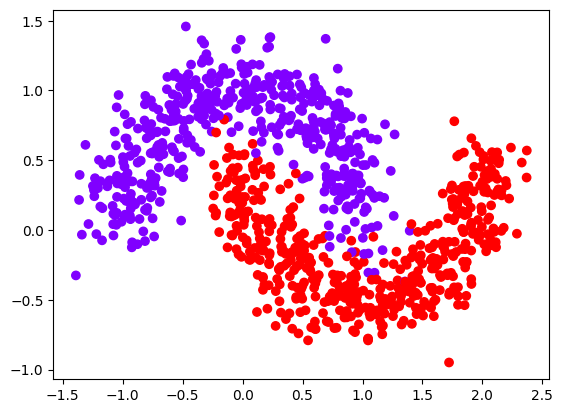

In [3]:
plt.scatter(moons[..., 0], moons[..., 1], c=moons_labels, cmap='rainbow')
plt.plot()

In [4]:
moons_ds = Dataset(moons, moons_labels)

train_size = int(0.85 * len(moons_ds))
valid_size = len(moons_ds) - train_size

moons_train, moons_valid = torch.utils.data.random_split(moons_ds, [train_size, valid_size])

In [5]:
PROJECT_NAME = 'classification-playground-moons'

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jmisilo. Use `wandb login --relogin` to force relogin


True

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
hparams_tuning(sweep_config, nn.BCELoss, moons_train, val_ds=moons_valid, project_name=PROJECT_NAME, in_features=moons_ds.num_features, out_features=moons_ds.num_labels, save_dir='moons', device=device)

Create sweep with ID: 1ltn88di
Sweep URL: https://wandb.ai/jmisilo/classification-playground-moons-sweep/sweeps/1ltn88di


wandb: Agent Starting Run: eslph6zs with config:
wandb: 	batch_size_exp: 9
wandb: 	dropout: 0.010549279625659711
wandb: 	epochs: 9
wandb: 	k: 0.2745124725098039
wandb: 	lr: 0.46725660511093703
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


d:\workspace\python\classification-playground\venv\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")
Epoch: 0 | Loss: --- | Acc: ---:   0%|          | 0/2 [00:00<?, ?it/s]d:\workspace\python\classification-playground\venv\lib\site-packages\torch\amp\autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
Epoch: 0 | Loss: 0.702 | Acc: 50.71%: 100%|██████████| 2/2 [00:00<00:00, 27.03it/s]
Validation Loss: 0.710 | Validation Acc: 46.00%: 100%|██████████| 1/1 [00:00<00:00, 62.60it/s]
Epoch: 1 | Loss: 0.689 | Acc: 53.65%: 100%|██████████| 2/2 [00:00<00:00, 40.01it/s]
Validation Loss: 0.642 | Validation Acc: 54.00%: 100%|██████████| 1/1 [00:00<00:00, 66.69it/s]

lr,▁▅█▇▆▅▄▃▂
t_accuracy,▁▂▃▇█████
t_loss,██▇▃▁▂▁▁▁
val_accuracy,▁▂▇▇█████
val_loss,█▇▂▁▂▁▁▁▁
lr,0.03119
t_accuracy,0.87059
t_loss,0.2837
val_accuracy,0.88667
val_loss,0.25792


wandb: Agent Starting Run: 6bk2o6rt with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.20312986988254284
wandb: 	epochs: 20
wandb: 	k: 0.5478104084591778
wandb: 	lr: 0.49747813046387074
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.702 | Acc: 49.29%: 100%|██████████| 14/14 [00:00<00:00, 118.64it/s]
Validation Loss: 0.697 | Validation Acc: 54.00%: 100%|██████████| 3/3 [00:00<00:00, 176.47it/s]
Epoch: 1 | Loss: 0.587 | Acc: 73.06%: 100%|██████████| 14/14 [00:00<00:00, 99.29it/s]
Validation Loss: 0.356 | Validation Acc: 85.33%: 100%|██████████| 3/3 [00:00<00:00, 176.49it/s]
Epoch: 2 | Loss: 0.374 | Acc: 84.24%: 100%|██████████| 14/14 [00:00<00:00, 101.45it/s]
Validation Loss: 0.273 | Validation Acc: 88.00%: 100%|██████████| 3/3 [00:00<00:00, 166.68it/s]
Epoch: 3 | Loss: 0.272 | Acc: 88.24%: 100%|██████████| 14/14 [00:00<00:00, 99.29it/s] 
Validation Loss: 0.222 | Validation Acc: 88.67%: 100%|██████████| 3/3 [00:00<00:00, 119.98it/s]
Epoch: 4 | Loss: 0.265 | Acc: 88.47%: 100%|██████████| 14/14 [00:00<00:00, 97.91it/s]
Validation Loss: 0.186 | Validation Acc: 89.33%: 100%|██████████| 3/3 [00:00<00:00, 111.13it/s]
Epoch: 5 | Loss: 0.218 | Acc: 91.41%: 100%|██████████| 14/14 [00:00<00:00, 92.71it/s]
V

lr,▁▂▂▃▄▅▅▆▇▇█▇▇▆▅▅▄▃▂▂
t_accuracy,▁▄▆▇▇▇▇████▇████████
t_loss,█▇▄▃▃▃▂▂▃▂▂▃▂▂▂▁▂▁▁▁
val_accuracy,▁▆▆▆▆▆▇█████████▇███
val_loss,█▄▄▃▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.02475
t_accuracy,0.97882
t_loss,0.05579
val_accuracy,0.98
val_loss,0.03119


wandb: Agent Starting Run: bd2kcvwt with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.07473762298691039
wandb: 	epochs: 37
wandb: 	k: 0.204897011583966
wandb: 	lr: 0.49929437777117947
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.696 | Acc: 49.29%: 100%|██████████| 27/27 [00:00<00:00, 80.60it/s] 
Validation Loss: 0.694 | Validation Acc: 54.00%: 100%|██████████| 5/5 [00:00<00:00, 77.44it/s]
Epoch: 1 | Loss: 0.402 | Acc: 79.76%: 100%|██████████| 27/27 [00:00<00:00, 49.95it/s]
Validation Loss: 0.296 | Validation Acc: 87.33%: 100%|██████████| 5/5 [00:00<00:00, 62.50it/s]
Epoch: 2 | Loss: 0.308 | Acc: 87.41%: 100%|██████████| 27/27 [00:00<00:00, 42.65it/s]
Validation Loss: 0.447 | Validation Acc: 84.00%: 100%|██████████| 5/5 [00:00<00:00, 121.97it/s]
Epoch: 3 | Loss: 0.310 | Acc: 88.12%: 100%|██████████| 27/27 [00:00<00:00, 65.13it/s]
Validation Loss: 0.114 | Validation Acc: 95.33%: 100%|██████████| 5/5 [00:00<00:00, 104.17it/s]
Epoch: 4 | Loss: 0.255 | Acc: 91.65%: 100%|██████████| 27/27 [00:00<00:00, 81.33it/s]
Validation Loss: 0.132 | Validation Acc: 96.00%: 100%|██████████| 5/5 [00:00<00:00, 100.00it/s]
Epoch: 5 | Loss: 0.203 | Acc: 94.59%: 100%|██████████| 27/27 [00:00<00:00, 69.93it/s]
Valid

lr,▁▂▃▄▅▆▇███▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
t_accuracy,▁▅▆▇▇▇▇▇▇████████████████████████████
t_loss,▄▃▂▂▂▂▂▅█▅▂▂▇▁▁▁▂▁▁▁▁▁▂▂▁▁▁▂▁▁▁▁▁▂▂▁▁
val_accuracy,▁▆▆▇▇▇█▇███▇▇▇███████████████████████
val_loss,█▄▅▂▂▃▂▂▃▁▁▇▂▂▂▁▂▁▁▁▁▂▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁
lr,0.00831
t_accuracy,0.98
t_loss,0.12361
val_accuracy,0.98
val_loss,0.0416


wandb: Agent Starting Run: knlwfiiq with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.05198097955713987
wandb: 	epochs: 45
wandb: 	k: 0.24109713870817737
wandb: 	lr: 0.48792448858806736
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.695 | Acc: 49.06%: 100%|██████████| 27/27 [00:00<00:00, 109.75it/s]
Validation Loss: 0.693 | Validation Acc: 54.00%: 100%|██████████| 5/5 [00:00<00:00, 151.50it/s]
Epoch: 1 | Loss: 0.517 | Acc: 74.71%: 100%|██████████| 27/27 [00:00<00:00, 69.95it/s]
Validation Loss: 0.276 | Validation Acc: 88.00%: 100%|██████████| 5/5 [00:00<00:00, 156.24it/s]
Epoch: 2 | Loss: 0.321 | Acc: 86.59%: 100%|██████████| 27/27 [00:00<00:00, 84.64it/s]
Validation Loss: 0.287 | Validation Acc: 86.67%: 100%|██████████| 5/5 [00:00<00:00, 178.61it/s]
Epoch: 3 | Loss: 0.295 | Acc: 86.94%: 100%|██████████| 27/27 [00:00<00:00, 64.75it/s]
Validation Loss: 0.300 | Validation Acc: 83.33%: 100%|██████████| 5/5 [00:00<00:00, 178.59it/s]
Epoch: 4 | Loss: 0.328 | Acc: 84.47%: 100%|██████████| 27/27 [00:00<00:00, 70.84it/s]
Validation Loss: 0.336 | Validation Acc: 88.00%: 100%|██████████| 5/5 [00:00<00:00, 59.14it/s]
Epoch: 5 | Loss: 0.317 | Acc: 86.94%: 100%|██████████| 27/27 [00:00<00:00, 31.25it/s]
Vali

lr,▁▂▂▃▄▅▅▆▇███▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▅▆▆▆▆▇▇▇▇▆▆▇█▇█████████▇███████████████
t_loss,▅▄▃▂▃▃▂▃▆▅▃▇▅▆▁▂▂▂▂▇▂▅▇█▇▅▂▁▂▂▃▄▄▂▂▇▆▃▂▂
val_accuracy,▁▆▆▅▆▆▆▇▇▆▇▆▇▇▇███████▇██▇██████████████
val_loss,▃▂▂▂▂▂▂▂▁▂▂█▁▁▁▁▁▁▁▁▁▁▇▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.0068
t_accuracy,0.97765
t_loss,0.1873
val_accuracy,0.98
val_loss,0.03473


wandb: Agent Starting Run: cpcjgrdg with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.24471304305511327
wandb: 	epochs: 35
wandb: 	k: 0.37963101035516406
wandb: 	lr: 0.4817762274235987
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.698 | Acc: 50.71%: 100%|██████████| 27/27 [00:00<00:00, 99.63it/s] 
Validation Loss: 0.708 | Validation Acc: 46.00%: 100%|██████████| 5/5 [00:00<00:00, 192.34it/s]
Epoch: 1 | Loss: 0.459 | Acc: 77.88%: 100%|██████████| 27/27 [00:00<00:00, 116.86it/s]
Validation Loss: 0.268 | Validation Acc: 87.33%: 100%|██████████| 5/5 [00:00<00:00, 208.38it/s]
Epoch: 2 | Loss: 0.328 | Acc: 86.82%: 100%|██████████| 27/27 [00:00<00:00, 98.17it/s] 
Validation Loss: 0.261 | Validation Acc: 88.00%: 100%|██████████| 5/5 [00:00<00:00, 185.13it/s]
Epoch: 3 | Loss: 0.307 | Acc: 86.82%: 100%|██████████| 27/27 [00:00<00:00, 110.84it/s]
Validation Loss: 0.247 | Validation Acc: 88.00%: 100%|██████████| 5/5 [00:00<00:00, 192.21it/s]
Epoch: 4 | Loss: 0.289 | Acc: 87.53%: 100%|██████████| 27/27 [00:00<00:00, 112.03it/s]
Validation Loss: 0.204 | Validation Acc: 88.67%: 100%|██████████| 5/5 [00:00<00:00, 147.10it/s]
Epoch: 5 | Loss: 0.226 | Acc: 91.06%: 100%|██████████| 27/27 [00:00<00:00, 109.95it/s

lr,▁▂▂▃▃▄▄▅▅▆▆▇▇██▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▁
t_accuracy,▁▅▆▆▆▇▇▇█▇▇█▇▇▇▇▇█▇▇▇▇█▇▇██████████
t_loss,▄▃▂▂▂▂▁▂▁▂▂▂▂▃█▆▅▃▃▃▃▂▂▆▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆▇▇▇██████▇█▇███▇▇███▇▇███████████
val_loss,█▄▃▃▃▂▁▁▁▁▁▁▁▃▁▂▃▆▃▂▂▁▄▃▂▁▁▂▂▁▂▂▁▁▁
lr,0.01055
t_accuracy,0.97412
t_loss,0.08418
val_accuracy,0.98
val_loss,0.05313


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 169thhdn with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.3750169397739149
wandb: 	epochs: 31
wandb: 	k: 0.554861268663872
wandb: 	lr: 0.42771668381129463
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.695 | Acc: 49.29%: 100%|██████████| 27/27 [00:00<00:00, 98.90it/s] 
Validation Loss: 0.689 | Validation Acc: 54.00%: 100%|██████████| 5/5 [00:00<00:00, 185.20it/s]
Epoch: 1 | Loss: 0.574 | Acc: 70.82%: 100%|██████████| 27/27 [00:00<00:00, 70.50it/s] 
Validation Loss: 0.297 | Validation Acc: 85.33%: 100%|██████████| 5/5 [00:00<00:00, 75.75it/s]
Epoch: 2 | Loss: 0.354 | Acc: 84.71%: 100%|██████████| 27/27 [00:00<00:00, 83.59it/s]
Validation Loss: 0.257 | Validation Acc: 88.00%: 100%|██████████| 5/5 [00:00<00:00, 72.46it/s]
Epoch: 3 | Loss: 0.321 | Acc: 86.82%: 100%|██████████| 27/27 [00:00<00:00, 77.59it/s]
Validation Loss: 0.299 | Validation Acc: 86.67%: 100%|██████████| 5/5 [00:00<00:00, 166.68it/s]
Epoch: 4 | Loss: 0.303 | Acc: 87.41%: 100%|██████████| 27/27 [00:00<00:00, 80.12it/s]
Validation Loss: 0.190 | Validation Acc: 88.67%: 100%|██████████| 5/5 [00:00<00:00, 147.06it/s]
Epoch: 5 | Loss: 0.222 | Acc: 90.35%: 100%|██████████| 27/27 [00:00<00:00, 80.36it/s]
Vali

lr,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇███▇▇▆▆▅▅▄▄▃▃▂▂
t_accuracy,▁▄▆▇▇▇███████▇▇█▇▇▇▇▇▇█████████
t_loss,▃▃▂▂▂▂▁▁▁▁▁▁▁▂▂▂▃▃▃▆▅█▃▂▁▂▁▁▁▁▁
val_accuracy,▁▆▆▆▆▇██████▇███▇▇█▆███████████
val_loss,▇▃▃▃▂▂▁▁▁▁▁▁▂▁▂▁▅▃▁▅█▂▂▁▂▁▁▂▁▁▁
lr,0.01307
t_accuracy,0.95765
t_loss,0.13787
val_accuracy,0.98
val_loss,0.08216


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: y66t4urk with config:
wandb: 	batch_size_exp: 3
wandb: 	dropout: 0.1862672566902277
wandb: 	epochs: 30
wandb: 	k: 0.5722120396172717
wandb: 	lr: 0.4432061145009225
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.705 | Acc: 49.29%: 100%|██████████| 107/107 [00:00<00:00, 115.72it/s]
Validation Loss: 0.694 | Validation Acc: 54.00%: 100%|██████████| 19/19 [00:00<00:00, 206.52it/s]
Epoch: 1 | Loss: 0.389 | Acc: 81.41%: 100%|██████████| 107/107 [00:01<00:00, 105.60it/s]
Validation Loss: 0.305 | Validation Acc: 87.33%: 100%|██████████| 19/19 [00:00<00:00, 182.72it/s]
Epoch: 2 | Loss: 0.317 | Acc: 86.94%: 100%|██████████| 107/107 [00:00<00:00, 113.36it/s]
Validation Loss: 0.258 | Validation Acc: 88.67%: 100%|██████████| 19/19 [00:00<00:00, 175.93it/s]
Epoch: 3 | Loss: 0.316 | Acc: 87.06%: 100%|██████████| 107/107 [00:01<00:00, 104.63it/s]
Validation Loss: 0.262 | Validation Acc: 88.00%: 100%|██████████| 19/19 [00:00<00:00, 174.31it/s]
Epoch: 4 | Loss: 0.345 | Acc: 85.29%: 100%|██████████| 107/107 [00:01<00:00, 103.26it/s]
Validation Loss: 0.247 | Validation Acc: 89.33%: 100%|██████████| 19/19 [00:00<00:00, 154.36it/s]
Epoch: 5 | Loss: 0.253 | Acc: 90.47%: 100%|██████████| 107/107 [0

lr,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██▇▇▆▆▅▅▄▄▃▃▂▂
t_accuracy,▁▆▇▇▆▇██████▇▇▇▇▆▆▆▇▇▅▆▆▇▇▇███
t_loss,▂▁▁▁▁▁▁▁▁▁▁▁▃▄▅█▄▆▄▄▄▃▂▂▄▃▃▂▁▁
val_accuracy,▁▆▆▆▇█▆█▇▆██▇▇▇▆▇▇▇▇█▅▆▆▇█████
val_loss,▁▁▁▁▁▁▁▁▁▁▁▁▃▃▂█▄▃▃▃▂▁▂▁▃▂▁▁▁▁
lr,0.01511
t_accuracy,0.93765
t_loss,0.409
val_accuracy,0.98
val_loss,0.04293


wandb: Agent Starting Run: 22qv8ggc with config:
wandb: 	batch_size_exp: 3
wandb: 	dropout: 0.23038426422878464
wandb: 	epochs: 45
wandb: 	k: 0.4597411865327592
wandb: 	lr: 0.4539523700042616
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.707 | Acc: 50.71%: 100%|██████████| 107/107 [00:00<00:00, 167.95it/s]
Validation Loss: 0.725 | Validation Acc: 46.00%: 100%|██████████| 19/19 [00:00<00:00, 260.29it/s]
Epoch: 1 | Loss: 0.400 | Acc: 77.65%: 100%|██████████| 107/107 [00:00<00:00, 152.62it/s]
Validation Loss: 0.274 | Validation Acc: 87.33%: 100%|██████████| 19/19 [00:00<00:00, 220.92it/s]
Epoch: 2 | Loss: 0.334 | Acc: 86.24%: 100%|██████████| 107/107 [00:00<00:00, 120.88it/s]
Validation Loss: 0.219 | Validation Acc: 89.33%: 100%|██████████| 19/19 [00:00<00:00, 226.17it/s]
Epoch: 3 | Loss: 0.299 | Acc: 88.71%: 100%|██████████| 107/107 [00:00<00:00, 132.39it/s]
Validation Loss: 0.216 | Validation Acc: 90.00%: 100%|██████████| 19/19 [00:00<00:00, 253.31it/s]
Epoch: 4 | Loss: 0.227 | Acc: 90.24%: 100%|██████████| 107/107 [00:00<00:00, 166.51it/s]
Validation Loss: 0.138 | Validation Acc: 95.33%: 100%|██████████| 19/19 [00:00<00:00, 301.58it/s]
Epoch: 5 | Loss: 0.234 | Acc: 91.76%: 100%|██████████| 107/107 [0

lr,▁▁▂▂▂▃▃▃▄▅▅▅▆▆▆▇▇███▇▇▇▇▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▁
t_accuracy,▁▅▇▇▇▇███▇█▇▇▃▅▆▂▁▂▁▁▁▂▂▁▂▂▂▂▂▂▂▁▁▂▂▂▂▂▂
t_loss,▁▁▁▁▁▁▁▁▁▁▂▁▂█▆▃▁▁▁▂▁▁▁▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▇▇▇█████▄██▄▃▆▆▁▁▁▂▂▁▂▂▁▁▂▁▁▁▁▂▁▁▁▁▂▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▄▁▁▆█▂▂▁▁▁▁▁▁▁▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00824
t_accuracy,0.58471
t_loss,0.66572
val_accuracy,0.46
val_loss,0.70583


wandb: Agent Starting Run: p9x2gmia with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.26166968230889254
wandb: 	epochs: 32
wandb: 	k: 0.44950519523909993
wandb: 	lr: 0.4531666241657955
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.694 | Acc: 49.29%: 100%|██████████| 14/14 [00:00<00:00, 94.61it/s]
Validation Loss: 0.688 | Validation Acc: 54.00%: 100%|██████████| 3/3 [00:00<00:00, 176.45it/s]
Epoch: 1 | Loss: 0.602 | Acc: 70.47%: 100%|██████████| 14/14 [00:00<00:00, 89.75it/s]
Validation Loss: 0.449 | Validation Acc: 79.33%: 100%|██████████| 3/3 [00:00<00:00, 142.90it/s]
Epoch: 2 | Loss: 0.401 | Acc: 82.59%: 100%|██████████| 14/14 [00:00<00:00, 80.92it/s]
Validation Loss: 0.275 | Validation Acc: 88.67%: 100%|██████████| 3/3 [00:00<00:00, 150.06it/s]
Epoch: 3 | Loss: 0.328 | Acc: 87.06%: 100%|██████████| 14/14 [00:00<00:00, 39.37it/s]
Validation Loss: 0.259 | Validation Acc: 88.67%: 100%|██████████| 3/3 [00:00<00:00, 96.78it/s]
Epoch: 4 | Loss: 0.322 | Acc: 85.41%: 100%|██████████| 14/14 [00:00<00:00, 84.34it/s]
Validation Loss: 0.291 | Validation Acc: 89.33%: 100%|██████████| 3/3 [00:00<00:00, 120.01it/s]
Epoch: 5 | Loss: 0.319 | Acc: 86.82%: 100%|██████████| 14/14 [00:00<00:00, 85.37it/s]
Valid

lr,▁▁▂▂▃▃▄▅▅▅▆▆▇▇██▇▇▆▆▆▅▅▅▄▄▃▃▃▂▂▁
t_accuracy,▁▄▆▆▆▆▇▇▇▇███▇█▇▇▇██████████████
t_loss,█▇▅▄▄▄▄▃▃▂▂▂▂▅▂▄▃▂▂▂▂▂▂▃▂▄▁▁▁▁▁▁
val_accuracy,▁▅▆▆▆▆▇▇▇██████▇▇███████████████
val_loss,█▅▄▃▄▃▃▂▂▁▁▁▁▁▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
lr,0.01141
t_accuracy,0.97059
t_loss,0.05663
val_accuracy,0.98667
val_loss,0.02476


wandb: Agent Starting Run: 247gnffx with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.13613039510191116
wandb: 	epochs: 31
wandb: 	k: 0.4595516928261962
wandb: 	lr: 0.4651362925005358
wandb: 	optimizer: SGD
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.691 | Acc: 50.71%: 100%|██████████| 14/14 [00:00<00:00, 108.53it/s]
Validation Loss: 0.695 | Validation Acc: 46.00%: 100%|██████████| 3/3 [00:00<00:00, 187.45it/s]
Epoch: 1 | Loss: 0.691 | Acc: 50.71%: 100%|██████████| 14/14 [00:00<00:00, 88.61it/s]
Validation Loss: 0.694 | Validation Acc: 46.00%: 100%|██████████| 3/3 [00:00<00:00, 99.99it/s]
Epoch: 2 | Loss: 0.690 | Acc: 50.71%: 100%|██████████| 14/14 [00:00<00:00, 66.99it/s]
Validation Loss: 0.693 | Validation Acc: 46.00%: 100%|██████████| 3/3 [00:00<00:00, 32.61it/s]
Epoch: 3 | Loss: 0.690 | Acc: 50.71%: 100%|██████████| 14/14 [00:00<00:00, 62.08it/s]
Validation Loss: 0.690 | Validation Acc: 46.00%: 100%|██████████| 3/3 [00:00<00:00, 115.41it/s]
Epoch: 4 | Loss: 0.688 | Acc: 50.71%: 100%|██████████| 14/14 [00:00<00:00, 69.65it/s]
Validation Loss: 0.688 | Validation Acc: 46.00%: 100%|██████████| 3/3 [00:00<00:00, 115.35it/s]
Epoch: 5 | Loss: 0.687 | Acc: 51.41%: 100%|██████████| 14/14 [00:00<00:00, 65.12it/s]
Valid

lr,▁▁▂▂▃▃▄▅▅▅▆▆▇▇██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁
t_accuracy,▁▁▁▁▁▁▃▄▅▅▅▆▆▆▇▇▇██████████████
t_loss,█████████▇▇▆▅▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▅▆▆▇▆▆▇▇▇▇▇██████████████
val_loss,█████████▇▇▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.01273
t_accuracy,0.86353
t_loss,0.31065
val_accuracy,0.89333
val_loss,0.25545


wandb: Agent Starting Run: 8uug5gfk with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.2713009713998182
wandb: 	epochs: 30
wandb: 	k: 0.4505243573241195
wandb: 	lr: 0.4760309982815409
wandb: 	optimizer: SGD
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.698 | Acc: 49.29%: 100%|██████████| 27/27 [00:00<00:00, 96.43it/s]
Validation Loss: 0.692 | Validation Acc: 54.00%: 100%|██████████| 5/5 [00:00<00:00, 161.26it/s]
Epoch: 1 | Loss: 0.699 | Acc: 49.29%: 100%|██████████| 27/27 [00:00<00:00, 114.85it/s]
Validation Loss: 0.691 | Validation Acc: 54.00%: 100%|██████████| 5/5 [00:00<00:00, 166.64it/s]
Epoch: 2 | Loss: 0.694 | Acc: 49.06%: 100%|██████████| 27/27 [00:00<00:00, 112.20it/s]
Validation Loss: 0.689 | Validation Acc: 54.00%: 100%|██████████| 5/5 [00:00<00:00, 172.42it/s]
Epoch: 3 | Loss: 0.690 | Acc: 51.06%: 100%|██████████| 27/27 [00:00<00:00, 121.04it/s]
Validation Loss: 0.686 | Validation Acc: 54.00%: 100%|██████████| 5/5 [00:00<00:00, 185.23it/s]
Epoch: 4 | Loss: 0.688 | Acc: 57.88%: 100%|██████████| 27/27 [00:00<00:00, 84.37it/s]
Validation Loss: 0.682 | Validation Acc: 81.33%: 100%|██████████| 5/5 [00:00<00:00, 98.01it/s]
Epoch: 5 | Loss: 0.680 | Acc: 66.59%: 100%|██████████| 27/27 [00:00<00:00, 97.38it/s]
Va

lr,▁▂▂▃▃▄▄▅▅▆▆▇▇██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁
t_accuracy,▁▁▁▁▃▄▅▅▆▆▇▇▇█████████████████
t_loss,██████▇▇▅▄▃▃▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▆▅▅▅▆▇▇▇▇█████████████████
val_loss,██████▇▆▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.01333
t_accuracy,0.87882
t_loss,0.30895
val_accuracy,0.88
val_loss,0.25677


wandb: Agent Starting Run: xeiugbzd with config:
wandb: 	batch_size_exp: 4
wandb: 	dropout: 0.2852391243728183
wandb: 	epochs: 24
wandb: 	k: 0.5524766604497237
wandb: 	lr: 0.48061940423380234
wandb: 	optimizer: SGD
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.697 | Acc: 47.76%: 100%|██████████| 54/54 [00:00<00:00, 134.63it/s]
Validation Loss: 0.697 | Validation Acc: 54.00%: 100%|██████████| 10/10 [00:00<00:00, 227.29it/s]
Epoch: 1 | Loss: 0.696 | Acc: 47.06%: 100%|██████████| 54/54 [00:00<00:00, 146.34it/s]
Validation Loss: 0.695 | Validation Acc: 54.00%: 100%|██████████| 10/10 [00:00<00:00, 136.99it/s]
Epoch: 2 | Loss: 0.694 | Acc: 49.06%: 100%|██████████| 54/54 [00:00<00:00, 113.21it/s]
Validation Loss: 0.692 | Validation Acc: 46.00%: 100%|██████████| 10/10 [00:00<00:00, 185.18it/s]
Epoch: 3 | Loss: 0.690 | Acc: 58.24%: 100%|██████████| 54/54 [00:00<00:00, 116.49it/s]
Validation Loss: 0.687 | Validation Acc: 83.33%: 100%|██████████| 10/10 [00:00<00:00, 172.39it/s]
Epoch: 4 | Loss: 0.684 | Acc: 68.35%: 100%|██████████| 54/54 [00:00<00:00, 119.20it/s]
Validation Loss: 0.678 | Validation Acc: 84.00%: 100%|██████████| 10/10 [00:00<00:00, 161.25it/s]
Epoch: 5 | Loss: 0.668 | Acc: 74.12%: 100%|██████████| 54/54 [00:00<00:00, 

lr,▁▂▂▃▃▄▄▅▅▆▆▇▇█▇▇▆▅▅▄▄▃▂▂
t_accuracy,▁▁▁▃▅▆▇▇▇███████████████
t_loss,██████▇▄▂▂▂▂▂▂▁▂▁▁▁▁▁▂▁▂
val_accuracy,▂▂▁▇▇▇▇▇████████████████
val_loss,█████▇▅▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.021
t_accuracy,0.87412
t_loss,0.34472
val_accuracy,0.88
val_loss,0.24971


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1pb1yim1 with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.15314804256247033
wandb: 	epochs: 25
wandb: 	k: 0.6237877314151995
wandb: 	lr: 0.38463993063902474
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.698 | Acc: 50.71%: 100%|██████████| 27/27 [00:00<00:00, 115.88it/s]
Validation Loss: 0.706 | Validation Acc: 46.00%: 100%|██████████| 5/5 [00:00<00:00, 208.35it/s]
Epoch: 1 | Loss: 0.636 | Acc: 63.76%: 100%|██████████| 27/27 [00:00<00:00, 107.55it/s]
Validation Loss: 0.413 | Validation Acc: 82.67%: 100%|██████████| 5/5 [00:00<00:00, 178.56it/s]
Epoch: 2 | Loss: 0.351 | Acc: 84.00%: 100%|██████████| 27/27 [00:00<00:00, 109.49it/s]
Validation Loss: 0.284 | Validation Acc: 86.67%: 100%|██████████| 5/5 [00:00<00:00, 192.28it/s]
Epoch: 3 | Loss: 0.308 | Acc: 86.94%: 100%|██████████| 27/27 [00:00<00:00, 64.31it/s]
Validation Loss: 0.263 | Validation Acc: 87.33%: 100%|██████████| 5/5 [00:00<00:00, 192.35it/s]
Epoch: 4 | Loss: 0.301 | Acc: 85.53%: 100%|██████████| 27/27 [00:00<00:00, 83.85it/s] 
Validation Loss: 0.267 | Validation Acc: 88.67%: 100%|██████████| 5/5 [00:00<00:00, 98.03it/s]
Epoch: 5 | Loss: 0.309 | Acc: 86.12%: 100%|██████████| 27/27 [00:00<00:00, 97.83it/s]
V

lr,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██▇▇▆▅▅▄▃▂▂
t_accuracy,▁▃▆▆▆▆▆▆▇████████████████
t_loss,█▇▄▄▄▄▄▄▃▂▂▂▂▂▂▁▂▁▂▂▁▁▁▁▁
val_accuracy,▁▆▆▆▇▇▇▇█▇████████▆██████
val_loss,█▅▄▃▃▄▃▃▁▂▂▁▂▁▁▁▂▁▃▂▁▁▁▁▁
lr,0.01479
t_accuracy,0.98118
t_loss,0.06015
val_accuracy,0.98
val_loss,0.03976


wandb: Agent Starting Run: d1ilfn8d with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.30318707332801625
wandb: 	epochs: 14
wandb: 	k: 0.629457143112371
wandb: 	lr: 0.45062810140086423
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.696 | Acc: 49.76%: 100%|██████████| 7/7 [00:00<00:00, 74.47it/s]
Validation Loss: 0.695 | Validation Acc: 54.00%: 100%|██████████| 2/2 [00:00<00:00, 90.93it/s]
Epoch: 1 | Loss: 0.625 | Acc: 68.35%: 100%|██████████| 7/7 [00:00<00:00, 50.00it/s]
Validation Loss: 0.489 | Validation Acc: 78.67%: 100%|██████████| 2/2 [00:00<00:00, 105.30it/s]
Epoch: 2 | Loss: 0.453 | Acc: 82.12%: 100%|██████████| 7/7 [00:00<00:00, 66.67it/s]
Validation Loss: 0.265 | Validation Acc: 86.67%: 100%|██████████| 2/2 [00:00<00:00, 111.11it/s]
Epoch: 3 | Loss: 0.363 | Acc: 86.00%: 100%|██████████| 7/7 [00:00<00:00, 71.43it/s]
Validation Loss: 0.295 | Validation Acc: 89.33%: 100%|██████████| 2/2 [00:00<00:00, 99.98it/s]
Epoch: 4 | Loss: 0.343 | Acc: 86.59%: 100%|██████████| 7/7 [00:00<00:00, 76.92it/s]
Validation Loss: 0.274 | Validation Acc: 87.33%: 100%|██████████| 2/2 [00:00<00:00, 105.27it/s]
Epoch: 5 | Loss: 0.329 | Acc: 86.47%: 100%|██████████| 7/7 [00:00<00:00, 70.00it/s]
Validation Loss: 0

lr,▁▂▃▄▅▅▆▇█▇▆▅▃▂
t_accuracy,▁▄▇▇█▇▇▇██████
t_loss,█▇▄▃▃▂▃▂▃▂▂▁▁▁
val_accuracy,▁▅▇▇▇▇▇▇▇▇▇█▇█
val_loss,█▅▂▃▂▃▂▂▂▂▁▁▁▁
lr,0.03384
t_accuracy,0.89294
t_loss,0.23924
val_accuracy,0.94667
val_loss,0.16841


wandb: Agent Starting Run: y6u5ok84 with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.055476736391213144
wandb: 	epochs: 36
wandb: 	k: 0.23600418209709928
wandb: 	lr: 0.4557496531179238
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.690 | Acc: 50.71%: 100%|██████████| 7/7 [00:00<00:00, 73.68it/s]
Validation Loss: 0.692 | Validation Acc: 46.00%: 100%|██████████| 2/2 [00:00<00:00, 111.15it/s]
Epoch: 1 | Loss: 0.636 | Acc: 67.29%: 100%|██████████| 7/7 [00:00<00:00, 74.47it/s]
Validation Loss: 0.479 | Validation Acc: 83.33%: 100%|██████████| 2/2 [00:00<00:00, 105.27it/s]
Epoch: 2 | Loss: 0.414 | Acc: 82.59%: 100%|██████████| 7/7 [00:00<00:00, 74.47it/s]
Validation Loss: 0.289 | Validation Acc: 86.67%: 100%|██████████| 2/2 [00:00<00:00, 83.35it/s]
Epoch: 3 | Loss: 0.339 | Acc: 84.71%: 100%|██████████| 7/7 [00:00<00:00, 64.23it/s]
Validation Loss: 0.276 | Validation Acc: 86.00%: 100%|██████████| 2/2 [00:00<00:00, 117.66it/s]
Epoch: 4 | Loss: 0.294 | Acc: 86.59%: 100%|██████████| 7/7 [00:00<00:00, 84.33it/s]
Validation Loss: 0.242 | Validation Acc: 88.67%: 100%|██████████| 2/2 [00:00<00:00, 95.22it/s]
Epoch: 5 | Loss: 0.296 | Acc: 87.65%: 100%|██████████| 7/7 [00:00<00:00, 71.43it/s]
Validation Loss: 0

lr,▁▂▃▄▅▅▆▇███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▁▁
t_accuracy,▁▃▆▆▆▆▇▇▇▇▇█▇███████████████████████
t_loss,█▇▅▄▄▄▄▃▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆▆▆▇▇▇▇▇▇█▇████████████████████████
val_loss,█▆▄▄▃▃▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00742
t_accuracy,0.98471
t_loss,0.03606
val_accuracy,0.98667
val_loss,0.02292


wandb: Agent Starting Run: qcmj7rh2 with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.24902219539657283
wandb: 	epochs: 23
wandb: 	k: 0.5509006140456126
wandb: 	lr: 0.452662901910742
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.703 | Acc: 50.71%: 100%|██████████| 7/7 [00:00<00:00, 14.37it/s]
Validation Loss: 0.707 | Validation Acc: 46.00%: 100%|██████████| 2/2 [00:00<00:00, 60.61it/s]
Epoch: 1 | Loss: 0.673 | Acc: 59.29%: 100%|██████████| 7/7 [00:00<00:00, 26.32it/s]
Validation Loss: 0.591 | Validation Acc: 84.00%: 100%|██████████| 2/2 [00:00<00:00, 42.54it/s]
Epoch: 2 | Loss: 0.513 | Acc: 78.35%: 100%|██████████| 7/7 [00:00<00:00, 25.09it/s]
Validation Loss: 0.383 | Validation Acc: 82.00%: 100%|██████████| 2/2 [00:00<00:00, 71.43it/s]
Epoch: 3 | Loss: 0.375 | Acc: 82.71%: 100%|██████████| 7/7 [00:00<00:00, 38.67it/s]
Validation Loss: 0.267 | Validation Acc: 87.33%: 100%|██████████| 2/2 [00:00<00:00, 66.66it/s]
Epoch: 4 | Loss: 0.318 | Acc: 85.41%: 100%|██████████| 7/7 [00:00<00:00, 58.83it/s]
Validation Loss: 0.216 | Validation Acc: 89.33%: 100%|██████████| 2/2 [00:00<00:00, 86.94it/s]
Epoch: 5 | Loss: 0.287 | Acc: 87.53%: 100%|██████████| 7/7 [00:00<00:00, 49.79it/s]
Validation Loss: 0.21

lr,▁▂▂▃▃▄▅▅▆▆▇▇█▇▇▆▅▅▄▄▃▂▂
t_accuracy,▁▂▅▆▆▆▇▇▇██████████████
t_loss,██▆▄▄▄▃▃▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆▆▆▇▇▇▇▇█▇████████████
val_loss,█▇▅▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.01863
t_accuracy,0.98235
t_loss,0.05667
val_accuracy,0.98
val_loss,0.02793


wandb: Agent Starting Run: c8wka5k6 with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.18637602158567568
wandb: 	epochs: 23
wandb: 	k: 0.3208948732052409
wandb: 	lr: 0.4154376068561443
wandb: 	optimizer: SGD
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.700 | Acc: 48.94%: 100%|██████████| 14/14 [00:00<00:00, 95.89it/s] 
Validation Loss: 0.702 | Validation Acc: 46.00%: 100%|██████████| 3/3 [00:00<00:00, 166.67it/s]
Epoch: 1 | Loss: 0.699 | Acc: 47.29%: 100%|██████████| 14/14 [00:00<00:00, 84.33it/s]
Validation Loss: 0.701 | Validation Acc: 46.00%: 100%|██████████| 3/3 [00:00<00:00, 142.88it/s]
Epoch: 2 | Loss: 0.699 | Acc: 49.06%: 100%|██████████| 14/14 [00:00<00:00, 55.56it/s]
Validation Loss: 0.700 | Validation Acc: 46.00%: 100%|██████████| 3/3 [00:00<00:00, 125.02it/s]
Epoch: 3 | Loss: 0.698 | Acc: 46.82%: 100%|██████████| 14/14 [00:00<00:00, 62.22it/s]
Validation Loss: 0.698 | Validation Acc: 46.00%: 100%|██████████| 3/3 [00:00<00:00, 115.38it/s]
Epoch: 4 | Loss: 0.697 | Acc: 47.18%: 100%|██████████| 14/14 [00:00<00:00, 83.80it/s]
Validation Loss: 0.696 | Validation Acc: 46.00%: 100%|██████████| 3/3 [00:00<00:00, 83.33it/s]
Epoch: 5 | Loss: 0.695 | Acc: 49.88%: 100%|██████████| 14/14 [00:00<00:00, 45.95it/s]
Vali

lr,▁▂▃▄▅▆▇██▇▇▆▆▅▅▅▄▄▃▃▂▂▁
t_accuracy,▁▁▁▁▁▂▂▃▅▅▅▇▇▇█▇███████
t_loss,██████████▇▇▇▆▆▅▄▃▂▂▁▁▁
val_accuracy,▁▁▁▁▁▁▁▇▃▃▇████████████
val_loss,██████████▇▇▇▆▆▅▄▃▂▂▁▁▁
lr,0.01079
t_accuracy,0.80824
t_loss,0.44137
val_accuracy,0.85333
val_loss,0.38697


wandb: Agent Starting Run: 6ej67lbq with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.22327726577251256
wandb: 	epochs: 20
wandb: 	k: 0.5029002287060987
wandb: 	lr: 0.4819404035852425
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.697 | Acc: 50.35%: 100%|██████████| 14/14 [00:00<00:00, 52.24it/s]
Validation Loss: 0.693 | Validation Acc: 54.00%: 100%|██████████| 3/3 [00:00<00:00, 96.71it/s]
Epoch: 1 | Loss: 0.582 | Acc: 73.06%: 100%|██████████| 14/14 [00:00<00:00, 60.73it/s]
Validation Loss: 0.343 | Validation Acc: 85.33%: 100%|██████████| 3/3 [00:00<00:00, 99.98it/s]
Epoch: 2 | Loss: 0.369 | Acc: 84.12%: 100%|██████████| 14/14 [00:00<00:00, 73.68it/s]
Validation Loss: 0.266 | Validation Acc: 86.00%: 100%|██████████| 3/3 [00:00<00:00, 157.93it/s]
Epoch: 3 | Loss: 0.335 | Acc: 86.00%: 100%|██████████| 14/14 [00:00<00:00, 87.51it/s]
Validation Loss: 0.284 | Validation Acc: 88.00%: 100%|██████████| 3/3 [00:00<00:00, 96.76it/s]
Epoch: 4 | Loss: 0.335 | Acc: 87.29%: 100%|██████████| 14/14 [00:00<00:00, 94.60it/s]
Validation Loss: 0.268 | Validation Acc: 87.33%: 100%|██████████| 3/3 [00:00<00:00, 107.12it/s]
Epoch: 5 | Loss: 0.349 | Acc: 86.24%: 100%|██████████| 14/14 [00:00<00:00, 94.60it/s]
Validat

lr,▁▂▂▃▄▅▅▆▇▇█▇▇▆▅▅▄▃▂▂
t_accuracy,▁▄▆▆▆▆▆▆▆▆▇▇▇▇██████
t_loss,█▇▄▄▄▄▄▄▄▄▃▇▂▂▃▂▂▁▁▁
val_accuracy,▁▆▆▆▆▆▆▆▆▇▅█▇█▇█████
val_loss,█▄▄▄▄▃▄▄▄▃▆▁▂▁▂▁▁▁▁▁
lr,0.02323
t_accuracy,0.97765
t_loss,0.06443
val_accuracy,0.98667
val_loss,0.03552


wandb: Agent Starting Run: 9fcwodxa with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.0013088032047727238
wandb: 	epochs: 47
wandb: 	k: 0.07308317734486414
wandb: 	lr: 0.4740173290304656
wandb: 	optimizer: SGD
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.712 | Acc: 49.29%: 100%|██████████| 14/14 [00:00<00:00, 92.11it/s]
Validation Loss: 0.706 | Validation Acc: 54.00%: 100%|██████████| 3/3 [00:00<00:00, 43.48it/s]
Epoch: 1 | Loss: 0.709 | Acc: 49.29%: 100%|██████████| 14/14 [00:00<00:00, 58.58it/s]
Validation Loss: 0.701 | Validation Acc: 54.00%: 100%|██████████| 3/3 [00:00<00:00, 199.98it/s]
Epoch: 2 | Loss: 0.703 | Acc: 49.29%: 100%|██████████| 14/14 [00:00<00:00, 97.23it/s] 
Validation Loss: 0.697 | Validation Acc: 54.00%: 100%|██████████| 3/3 [00:00<00:00, 199.99it/s]
Epoch: 3 | Loss: 0.697 | Acc: 46.12%: 100%|██████████| 14/14 [00:00<00:00, 96.55it/s]
Validation Loss: 0.694 | Validation Acc: 54.00%: 100%|██████████| 3/3 [00:00<00:00, 130.44it/s]
Epoch: 4 | Loss: 0.694 | Acc: 44.00%: 100%|██████████| 14/14 [00:00<00:00, 94.60it/s]
Validation Loss: 0.692 | Validation Acc: 54.00%: 100%|██████████| 3/3 [00:00<00:00, 125.00it/s]
Epoch: 5 | Loss: 0.692 | Acc: 55.65%: 100%|██████████| 14/14 [00:00<00:00, 98.59it/s]
Vali

lr,▁▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▂▂▂▁▁▃▅▅▅▅▆▆▆▆▇▇▇███████████████████████
t_loss,████████▇▇▇▆▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▂▄▄▅▄▄▄▇▇▇▇▇▇██████████████████████
val_loss,████████▇▇▇▆▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00511
t_accuracy,0.87059
t_loss,0.27874
val_accuracy,0.88667
val_loss,0.25106


wandb: Agent Starting Run: 9gzuyitt with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.23478073135146835
wandb: 	epochs: 27
wandb: 	k: 0.33828533122709487
wandb: 	lr: 0.4443772320402821
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.704 | Acc: 50.71%: 100%|██████████| 7/7 [00:00<00:00, 77.79it/s]
Validation Loss: 0.706 | Validation Acc: 46.00%: 100%|██████████| 2/2 [00:00<00:00, 100.02it/s]
Epoch: 1 | Loss: 0.652 | Acc: 54.82%: 100%|██████████| 7/7 [00:00<00:00, 83.34it/s]
Validation Loss: 0.526 | Validation Acc: 79.33%: 100%|██████████| 2/2 [00:00<00:00, 95.21it/s]
Epoch: 2 | Loss: 0.432 | Acc: 82.35%: 100%|██████████| 7/7 [00:00<00:00, 65.42it/s]
Validation Loss: 0.335 | Validation Acc: 87.33%: 100%|██████████| 2/2 [00:00<00:00, 111.12it/s]
Epoch: 3 | Loss: 0.416 | Acc: 85.06%: 100%|██████████| 7/7 [00:00<00:00, 66.04it/s]
Validation Loss: 0.272 | Validation Acc: 88.67%: 100%|██████████| 2/2 [00:00<00:00, 79.98it/s]
Epoch: 4 | Loss: 0.359 | Acc: 85.06%: 100%|██████████| 7/7 [00:00<00:00, 65.42it/s]
Validation Loss: 0.251 | Validation Acc: 88.00%: 100%|██████████| 2/2 [00:00<00:00, 40.81it/s]
Epoch: 5 | Loss: 0.330 | Acc: 86.00%: 100%|██████████| 7/7 [00:00<00:00, 38.04it/s]
Validation Loss: 0.

lr,▁▂▃▃▄▅▆▆▇██▇▇▆▆▆▅▅▅▄▄▃▃▃▂▂▁
t_accuracy,▁▂▆▆▆▆▆▆▆▆▇▇▇▇▇▇███████████
t_loss,█▇▅▅▄▄▄▄▄▄▄▃▃▄▃▂▂▂▁▂▁▁▃▁▁▂▁
val_accuracy,▁▅▆▇▇▇▇▆▇▇▇▇▇▇▇████████████
val_loss,█▆▄▄▃▄▃▄▄▃▃▃▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁
lr,0.01097
t_accuracy,0.97765
t_loss,0.06397
val_accuracy,0.98667
val_loss,0.01885


wandb: Agent Starting Run: 4kdrmk27 with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.22612173151621512
wandb: 	epochs: 17
wandb: 	k: 0.5622524519248736
wandb: 	lr: 0.4700285307107112
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.696 | Acc: 38.71%: 100%|██████████| 27/27 [00:00<00:00, 114.40it/s]
Validation Loss: 0.695 | Validation Acc: 25.33%: 100%|██████████| 5/5 [00:00<00:00, 217.42it/s]
Epoch: 1 | Loss: 0.476 | Acc: 77.88%: 100%|██████████| 27/27 [00:00<00:00, 112.92it/s]
Validation Loss: 0.286 | Validation Acc: 88.00%: 100%|██████████| 5/5 [00:00<00:00, 192.30it/s]
Epoch: 2 | Loss: 0.322 | Acc: 86.12%: 100%|██████████| 27/27 [00:00<00:00, 114.89it/s]
Validation Loss: 0.280 | Validation Acc: 88.67%: 100%|██████████| 5/5 [00:00<00:00, 169.08it/s]
Epoch: 3 | Loss: 0.308 | Acc: 85.88%: 100%|██████████| 27/27 [00:00<00:00, 111.58it/s]
Validation Loss: 0.287 | Validation Acc: 88.00%: 100%|██████████| 5/5 [00:00<00:00, 166.70it/s]
Epoch: 4 | Loss: 0.399 | Acc: 88.35%: 100%|██████████| 27/27 [00:00<00:00, 108.00it/s]
Validation Loss: 0.227 | Validation Acc: 91.33%: 100%|██████████| 5/5 [00:00<00:00, 135.16it/s]
Epoch: 5 | Loss: 0.834 | Acc: 89.06%: 100%|██████████| 27/27 [00:00<00:00, 106.72it/s

lr,▁▂▃▃▄▅▆▆▇█▇▆▅▅▄▃▂
t_accuracy,▁▆▇▇▇▇▇█▇▇▇▇▇████
t_loss,▅▄▃▃▃▆▂▂▄▅▄█▂▂▁▁▁
val_accuracy,▁▇▇▇▇▇██▇████████
val_loss,█▄▄▄▃▃▂▂▃▁▃▃▁▁▁▁▁
lr,0.02762
t_accuracy,0.95529
t_loss,0.10124
val_accuracy,0.98667
val_loss,0.02709


wandb: Agent Starting Run: nphwwqlx with config:
wandb: 	batch_size_exp: 9
wandb: 	dropout: 0.015877285457243262
wandb: 	epochs: 41
wandb: 	k: 0.16674846254466902
wandb: 	lr: 0.4792918030922437
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.695 | Acc: 50.71%: 100%|██████████| 2/2 [00:00<00:00, 14.93it/s]
Validation Loss: 0.705 | Validation Acc: 46.00%: 100%|██████████| 1/1 [00:00<00:00, 52.65it/s]
Epoch: 1 | Loss: 0.685 | Acc: 50.71%: 100%|██████████| 2/2 [00:00<00:00, 18.35it/s]
Validation Loss: 0.648 | Validation Acc: 78.67%: 100%|██████████| 1/1 [00:00<00:00, 41.67it/s]
Epoch: 2 | Loss: 0.594 | Acc: 81.88%: 100%|██████████| 2/2 [00:00<00:00, 26.67it/s]
Validation Loss: 0.393 | Validation Acc: 82.00%: 100%|██████████| 1/1 [00:00<00:00, 37.03it/s]
Epoch: 3 | Loss: 0.398 | Acc: 82.24%: 100%|██████████| 2/2 [00:00<00:00, 27.78it/s]
Validation Loss: 0.375 | Validation Acc: 86.67%: 100%|██████████| 1/1 [00:00<00:00, 41.66it/s]
Epoch: 4 | Loss: 0.419 | Acc: 86.12%: 100%|██████████| 2/2 [00:00<00:00, 23.26it/s]
Validation Loss: 0.296 | Validation Acc: 89.33%: 100%|██████████| 1/1 [00:00<00:00, 62.51it/s]
Epoch: 5 | Loss: 0.349 | Acc: 85.88%: 100%|██████████| 2/2 [00:00<00:00, 29.41it/s]
Validation Loss: 0.37

lr,▁▂▃▅▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▁▆▆▆▆▆▆▆▆▆▆▆▆▇▆▆▆▆▆▇▇▇▇▇▇▇▇████████████
t_loss,██▇▅▅▄▄▄▄▄▄▃▄▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▃▁▁▁▁▁▁▁▁▁
val_accuracy,▁▅▆▆▇▆▇▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▇▅▅▄▅▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
lr,0.00656
t_accuracy,0.98
t_loss,0.05544
val_accuracy,0.98
val_loss,0.03383


wandb: Agent Starting Run: 9q8utgxs with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.12456310282270232
wandb: 	epochs: 39
wandb: 	k: 0.0538851019083916
wandb: 	lr: 0.46151757303855434
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.701 | Acc: 50.71%: 100%|██████████| 7/7 [00:00<00:00, 50.00it/s]
Validation Loss: 0.704 | Validation Acc: 46.00%: 100%|██████████| 2/2 [00:00<00:00, 74.10it/s]
Epoch: 1 | Loss: 0.465 | Acc: 77.65%: 100%|██████████| 7/7 [00:00<00:00, 53.44it/s]
Validation Loss: 0.380 | Validation Acc: 86.00%: 100%|██████████| 2/2 [00:00<00:00, 76.48it/s]
Epoch: 2 | Loss: 0.375 | Acc: 86.59%: 100%|██████████| 7/7 [00:00<00:00, 54.68it/s]
Validation Loss: 0.246 | Validation Acc: 89.33%: 100%|██████████| 2/2 [00:00<00:00, 95.23it/s]
Epoch: 3 | Loss: 0.336 | Acc: 87.06%: 100%|██████████| 7/7 [00:00<00:00, 60.34it/s]
Validation Loss: 0.232 | Validation Acc: 90.67%: 100%|██████████| 2/2 [00:00<00:00, 90.93it/s]
Epoch: 4 | Loss: 0.255 | Acc: 89.41%: 100%|██████████| 7/7 [00:00<00:00, 54.69it/s]
Validation Loss: 0.143 | Validation Acc: 95.33%: 100%|██████████| 2/2 [00:00<00:00, 86.97it/s]
Epoch: 5 | Loss: 0.189 | Acc: 95.29%: 100%|██████████| 7/7 [00:00<00:00, 50.72it/s]
Validation Loss: 0.06

lr,▁▅███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▅▆▆▇██████████████████████████████████
t_loss,█▆▅▄▃▃▂▂▂▁▂▁▂▂▁▁▁▁▂▂▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆▇▇▇██████████████████████████████████
val_loss,█▅▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00576
t_accuracy,0.98471
t_loss,0.0448
val_accuracy,0.99333
val_loss,0.01974


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ws831iw4 with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.18683432439800135
wandb: 	epochs: 39
wandb: 	k: 0.16289377981832454
wandb: 	lr: 0.46476542362817186
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.696 | Acc: 50.71%: 100%|██████████| 7/7 [00:00<00:00, 16.31it/s]
Validation Loss: 0.699 | Validation Acc: 46.00%: 100%|██████████| 2/2 [00:00<00:00, 57.13it/s]
Epoch: 1 | Loss: 0.628 | Acc: 67.29%: 100%|██████████| 7/7 [00:00<00:00, 32.86it/s]
Validation Loss: 0.411 | Validation Acc: 81.33%: 100%|██████████| 2/2 [00:00<00:00, 66.68it/s]
Epoch: 2 | Loss: 0.389 | Acc: 81.65%: 100%|██████████| 7/7 [00:00<00:00, 43.48it/s]
Validation Loss: 0.258 | Validation Acc: 88.00%: 100%|██████████| 2/2 [00:00<00:00, 52.63it/s]
Epoch: 3 | Loss: 0.326 | Acc: 85.53%: 100%|██████████| 7/7 [00:00<00:00, 40.70it/s]
Validation Loss: 0.227 | Validation Acc: 88.00%: 100%|██████████| 2/2 [00:00<00:00, 83.32it/s]
Epoch: 4 | Loss: 0.303 | Acc: 88.00%: 100%|██████████| 7/7 [00:00<00:00, 64.81it/s]
Validation Loss: 0.236 | Validation Acc: 88.00%: 100%|██████████| 2/2 [00:00<00:00, 111.08it/s]
Epoch: 5 | Loss: 0.284 | Acc: 87.65%: 100%|██████████| 7/7 [00:00<00:00, 38.67it/s]
Validation Loss: 0.1

lr,▁▂▃▄▆▇███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▃▆▆▆▆▇▇▇▇█▇███████████████████████████
t_loss,█▇▅▄▄▄▃▃▃▂▃▂▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆▇▇▇▇▇▇▇█████▇████████████████████████
val_loss,█▅▃▃▃▃▃▃▂▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00655
t_accuracy,0.98588
t_loss,0.0425
val_accuracy,0.98667
val_loss,0.02014


wandb: Agent Starting Run: atkw82ru with config:
wandb: 	batch_size_exp: 9
wandb: 	dropout: 0.15157436190525625
wandb: 	epochs: 43
wandb: 	k: 0.21884657385173897
wandb: 	lr: 0.48313281205289743
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.697 | Acc: 39.18%: 100%|██████████| 2/2 [00:00<00:00, 33.34it/s]
Validation Loss: 0.697 | Validation Acc: 27.33%: 100%|██████████| 1/1 [00:00<00:00, 62.49it/s]
Epoch: 1 | Loss: 0.693 | Acc: 42.71%: 100%|██████████| 2/2 [00:00<00:00, 35.09it/s]
Validation Loss: 0.684 | Validation Acc: 46.67%: 100%|██████████| 1/1 [00:00<00:00, 58.83it/s]
Epoch: 2 | Loss: 0.671 | Acc: 61.41%: 100%|██████████| 2/2 [00:00<00:00, 37.74it/s]
Validation Loss: 0.627 | Validation Acc: 75.33%: 100%|██████████| 1/1 [00:00<00:00, 66.68it/s]
Epoch: 3 | Loss: 0.573 | Acc: 76.82%: 100%|██████████| 2/2 [00:00<00:00, 35.71it/s]
Validation Loss: 0.390 | Validation Acc: 82.00%: 100%|██████████| 1/1 [00:00<00:00, 66.66it/s]
Epoch: 4 | Loss: 0.398 | Acc: 81.06%: 100%|██████████| 2/2 [00:00<00:00, 37.04it/s]
Validation Loss: 0.353 | Validation Acc: 86.67%: 100%|██████████| 1/1 [00:00<00:00, 71.41it/s]
Epoch: 5 | Loss: 0.432 | Acc: 83.65%: 100%|██████████| 2/2 [00:00<00:00, 40.00it/s]
Validation Loss: 0.38

lr,▁▂▃▃▄▅▆▆▇███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▁▄▅▆▆▇▆▆▇▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
t_loss,███▇▅▅▇▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▆▆▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇██▇▇▇███████████████
val_loss,██▇▅▄▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00687
t_accuracy,0.97882
t_loss,0.07972
val_accuracy,0.98
val_loss,0.05377


wandb: Agent Starting Run: xgy5391g with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.10175422384019506
wandb: 	epochs: 47
wandb: 	k: 0.12538209510788062
wandb: 	lr: 0.48735792553647256
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.699 | Acc: 49.29%: 100%|██████████| 4/4 [00:00<00:00, 48.19it/s]
Validation Loss: 0.689 | Validation Acc: 54.00%: 100%|██████████| 1/1 [00:00<00:00, 76.94it/s]
Epoch: 1 | Loss: 0.670 | Acc: 58.59%: 100%|██████████| 4/4 [00:00<00:00, 47.62it/s]
Validation Loss: 0.601 | Validation Acc: 75.33%: 100%|██████████| 1/1 [00:00<00:00, 71.42it/s]
Epoch: 2 | Loss: 0.464 | Acc: 77.29%: 100%|██████████| 4/4 [00:00<00:00, 41.23it/s]
Validation Loss: 0.418 | Validation Acc: 83.33%: 100%|██████████| 1/1 [00:00<00:00, 66.61it/s]
Epoch: 3 | Loss: 0.372 | Acc: 84.82%: 100%|██████████| 4/4 [00:00<00:00, 42.56it/s]
Validation Loss: 0.365 | Validation Acc: 84.00%: 100%|██████████| 1/1 [00:00<00:00, 76.97it/s]
Epoch: 4 | Loss: 0.337 | Acc: 83.65%: 100%|██████████| 4/4 [00:00<00:00, 43.48it/s]
Validation Loss: 0.275 | Validation Acc: 85.33%: 100%|██████████| 1/1 [00:00<00:00, 66.67it/s]
Epoch: 5 | Loss: 0.289 | Acc: 85.29%: 100%|██████████| 4/4 [00:00<00:00, 45.97it/s]
Validation Loss: 0.30

lr,▁▂▄▅▇██▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁
t_accuracy,▁▂▅▆▆▆▆▇▆▇▇▇▇███████████████████████████
t_loss,██▆▅▄▄▃▃▃▃▃▅▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▆▆▆▆▆▆▆▇▇▇▇██▇████████████████████████
val_loss,█▇▅▅▄▄▃▃▃▂▂▃▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00566
t_accuracy,0.98
t_loss,0.04018
val_accuracy,0.99333
val_loss,0.03033


wandb: Agent Starting Run: 1gx5p0hb with config:
wandb: 	batch_size_exp: 9
wandb: 	dropout: 0.22287816192031976
wandb: 	epochs: 40
wandb: 	k: 0.07688142505427882
wandb: 	lr: 0.3674237899398212
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.695 | Acc: 43.18%: 100%|██████████| 2/2 [00:00<00:00, 35.72it/s]
Validation Loss: 0.695 | Validation Acc: 46.00%: 100%|██████████| 1/1 [00:00<00:00, 66.63it/s]
Epoch: 1 | Loss: 0.691 | Acc: 46.35%: 100%|██████████| 2/2 [00:00<00:00, 32.79it/s]
Validation Loss: 0.672 | Validation Acc: 66.67%: 100%|██████████| 1/1 [00:00<00:00, 50.00it/s]
Epoch: 2 | Loss: 0.644 | Acc: 70.00%: 100%|██████████| 2/2 [00:00<00:00, 26.67it/s]
Validation Loss: 0.483 | Validation Acc: 77.33%: 100%|██████████| 1/1 [00:00<00:00, 58.81it/s]
Epoch: 3 | Loss: 0.488 | Acc: 74.24%: 100%|██████████| 2/2 [00:00<00:00, 27.40it/s]
Validation Loss: 0.479 | Validation Acc: 82.00%: 100%|██████████| 1/1 [00:00<00:00, 66.63it/s]
Epoch: 4 | Loss: 0.483 | Acc: 79.18%: 100%|██████████| 2/2 [00:00<00:00, 29.86it/s]
Validation Loss: 0.294 | Validation Acc: 84.00%: 100%|██████████| 1/1 [00:00<00:00, 66.65it/s]
Epoch: 5 | Loss: 0.342 | Acc: 85.29%: 100%|██████████| 2/2 [00:00<00:00, 28.99it/s]
Validation Loss: 0.30

lr,▁▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▁▄▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇██████████████████████
t_loss,██▇▆▆▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇███████████████████████
val_loss,██▆▆▄▄▃▄▃▃▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00365
t_accuracy,0.97647
t_loss,0.05596
val_accuracy,0.98667
val_loss,0.03073


wandb: Agent Starting Run: a2mw5248 with config:
wandb: 	batch_size_exp: 9
wandb: 	dropout: 0.09069842742672762
wandb: 	epochs: 48
wandb: 	k: 0.11514417026129578
wandb: 	lr: 0.41188563859919336
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.692 | Acc: 50.71%: 100%|██████████| 2/2 [00:00<00:00, 22.99it/s]
Validation Loss: 0.699 | Validation Acc: 46.00%: 100%|██████████| 1/1 [00:00<00:00, 62.51it/s]
Epoch: 1 | Loss: 0.684 | Acc: 50.71%: 100%|██████████| 2/2 [00:00<00:00, 24.69it/s]
Validation Loss: 0.654 | Validation Acc: 72.67%: 100%|██████████| 1/1 [00:00<00:00, 58.81it/s]
Epoch: 2 | Loss: 0.615 | Acc: 74.59%: 100%|██████████| 2/2 [00:00<00:00, 25.32it/s]
Validation Loss: 0.478 | Validation Acc: 77.33%: 100%|██████████| 1/1 [00:00<00:00, 58.82it/s]
Epoch: 3 | Loss: 0.434 | Acc: 79.29%: 100%|██████████| 2/2 [00:00<00:00, 33.90it/s]
Validation Loss: 0.306 | Validation Acc: 86.00%: 100%|██████████| 1/1 [00:00<00:00, 55.56it/s]
Epoch: 4 | Loss: 0.361 | Acc: 86.12%: 100%|██████████| 2/2 [00:00<00:00, 26.32it/s]
Validation Loss: 0.284 | Validation Acc: 88.67%: 100%|██████████| 1/1 [00:00<00:00, 62.49it/s]
Epoch: 5 | Loss: 0.330 | Acc: 86.00%: 100%|██████████| 2/2 [00:00<00:00, 33.90it/s]
Validation Loss: 0.29

lr,▁▂▄▅▇████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▁▅▅▆▆▆▆▆▆▇▇▇▇▇▇████████████████████████
t_loss,██▇▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▅▅▆▇▇▆▆▆▇▇▇▇▇▇█████████████████████████
val_loss,██▆▄▄▃▄▄▃▃▃▃▃▃▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00395
t_accuracy,0.97176
t_loss,0.06358
val_accuracy,0.99333
val_loss,0.02695


wandb: Agent Starting Run: sbiijmfy with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.035056461939615646
wandb: 	epochs: 41
wandb: 	k: 0.1291312821028788
wandb: 	lr: 0.34683815941525076
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.705 | Acc: 50.71%: 100%|██████████| 7/7 [00:00<00:00, 58.83it/s]
Validation Loss: 0.708 | Validation Acc: 46.00%: 100%|██████████| 2/2 [00:00<00:00, 105.29it/s]
Epoch: 1 | Loss: 0.662 | Acc: 63.06%: 100%|██████████| 7/7 [00:00<00:00, 71.43it/s]
Validation Loss: 0.543 | Validation Acc: 85.33%: 100%|██████████| 2/2 [00:00<00:00, 100.03it/s]
Epoch: 2 | Loss: 0.433 | Acc: 82.94%: 100%|██████████| 7/7 [00:00<00:00, 68.63it/s]
Validation Loss: 0.306 | Validation Acc: 86.00%: 100%|██████████| 2/2 [00:00<00:00, 100.01it/s]
Epoch: 3 | Loss: 0.339 | Acc: 87.18%: 100%|██████████| 7/7 [00:00<00:00, 72.17it/s]
Validation Loss: 0.313 | Validation Acc: 84.67%: 100%|██████████| 2/2 [00:00<00:00, 100.00it/s]
Epoch: 4 | Loss: 0.307 | Acc: 86.12%: 100%|██████████| 7/7 [00:00<00:00, 76.09it/s]
Validation Loss: 0.250 | Validation Acc: 86.67%: 100%|██████████| 2/2 [00:00<00:00, 105.28it/s]
Epoch: 5 | Loss: 0.289 | Acc: 85.65%: 100%|██████████| 7/7 [00:00<00:00, 65.42it/s]
Validation Loss:

lr,▁▂▄▅▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▃▆▆▆▆▆▆▆▆▆▆▇▇▇▇████████████████████████
t_loss,██▅▄▄▄▄▄▄▄▄▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆▆▆▆▆▇▇▇▆▇▇▇▇▇▇████████████████████████
val_loss,█▆▄▄▃▄▃▃▃▄▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00334
t_accuracy,0.98588
t_loss,0.03781
val_accuracy,0.98667
val_loss,0.02148


wandb: Agent Starting Run: eqg0b73n with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.06598797559039754
wandb: 	epochs: 46
wandb: 	k: 0.14603633272224695
wandb: 	lr: 0.4590248840473051
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.696 | Acc: 49.29%: 100%|██████████| 4/4 [00:00<00:00, 43.48it/s]
Validation Loss: 0.692 | Validation Acc: 54.00%: 100%|██████████| 1/1 [00:00<00:00, 62.50it/s]
Epoch: 1 | Loss: 0.690 | Acc: 58.24%: 100%|██████████| 4/4 [00:00<00:00, 43.96it/s]
Validation Loss: 0.681 | Validation Acc: 46.00%: 100%|██████████| 1/1 [00:00<00:00, 71.43it/s]
Epoch: 2 | Loss: 0.595 | Acc: 68.59%: 100%|██████████| 4/4 [00:00<00:00, 43.48it/s]
Validation Loss: 0.379 | Validation Acc: 79.33%: 100%|██████████| 1/1 [00:00<00:00, 66.68it/s]
Epoch: 3 | Loss: 0.434 | Acc: 81.76%: 100%|██████████| 4/4 [00:00<00:00, 44.95it/s]
Validation Loss: 0.280 | Validation Acc: 88.67%: 100%|██████████| 1/1 [00:00<00:00, 83.35it/s]
Epoch: 4 | Loss: 0.357 | Acc: 84.47%: 100%|██████████| 4/4 [00:00<00:00, 29.20it/s]
Validation Loss: 0.366 | Validation Acc: 84.00%: 100%|██████████| 1/1 [00:00<00:00, 41.65it/s]
Epoch: 5 | Loss: 0.327 | Acc: 84.59%: 100%|██████████| 4/4 [00:00<00:00, 33.61it/s]
Validation Loss: 0.28

lr,▁▂▃▅▆▇██▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁
t_accuracy,▁▂▄▆▆▆▆▆▆▆▇▇████████████████████████████
t_loss,██▇▅▄▄▄▄▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▂▁▅▇▆▆▆▆▇▇▇▇████████████████████████████
val_loss,██▅▄▅▄▄▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00527
t_accuracy,0.98588
t_loss,0.03746
val_accuracy,0.98667
val_loss,0.02969


wandb: Agent Starting Run: 5jna76oe with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.0005337322169531311
wandb: 	epochs: 40
wandb: 	k: 0.19630924150357917
wandb: 	lr: 0.4280176979828161
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.702 | Acc: 49.29%: 100%|██████████| 7/7 [00:00<00:00, 81.40it/s]
Validation Loss: 0.700 | Validation Acc: 54.00%: 100%|██████████| 2/2 [00:00<00:00, 90.89it/s]
Epoch: 1 | Loss: 0.664 | Acc: 65.88%: 100%|██████████| 7/7 [00:00<00:00, 80.46it/s]
Validation Loss: 0.579 | Validation Acc: 74.67%: 100%|██████████| 2/2 [00:00<00:00, 99.96it/s]
Epoch: 2 | Loss: 0.420 | Acc: 81.18%: 100%|██████████| 7/7 [00:00<00:00, 76.92it/s]
Validation Loss: 0.294 | Validation Acc: 86.67%: 100%|██████████| 2/2 [00:00<00:00, 86.98it/s]
Epoch: 3 | Loss: 0.340 | Acc: 86.24%: 100%|██████████| 7/7 [00:00<00:00, 50.72it/s]
Validation Loss: 0.302 | Validation Acc: 87.33%: 100%|██████████| 2/2 [00:00<00:00, 83.33it/s]
Epoch: 4 | Loss: 0.293 | Acc: 86.24%: 100%|██████████| 7/7 [00:00<00:00, 53.85it/s]
Validation Loss: 0.262 | Validation Acc: 87.33%: 100%|██████████| 2/2 [00:00<00:00, 95.24it/s]
Epoch: 5 | Loss: 0.285 | Acc: 87.41%: 100%|██████████| 7/7 [00:00<00:00, 55.56it/s]
Validation Loss: 0.25

lr,▁▂▃▄▅▆▇███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▃▆▆▆▆▆▇▇▇▇▇████████████████████████████
t_loss,██▅▄▄▄▄▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▆▆▆▆▆▆▆▇▇█████████████████████████████
val_loss,█▇▄▄▃▃▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00555
t_accuracy,0.98471
t_loss,0.03852
val_accuracy,0.98667
val_loss,0.0226


wandb: Agent Starting Run: 22y7xwtp with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.009889579058610376
wandb: 	epochs: 38
wandb: 	k: 0.14651984657261302
wandb: 	lr: 0.40914892040475126
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.701 | Acc: 50.71%: 100%|██████████| 7/7 [00:00<00:00, 76.09it/s]
Validation Loss: 0.705 | Validation Acc: 46.00%: 100%|██████████| 2/2 [00:00<00:00, 111.08it/s]
Epoch: 1 | Loss: 0.652 | Acc: 64.12%: 100%|██████████| 7/7 [00:00<00:00, 77.78it/s]
Validation Loss: 0.491 | Validation Acc: 83.33%: 100%|██████████| 2/2 [00:00<00:00, 100.00it/s]
Epoch: 2 | Loss: 0.397 | Acc: 83.18%: 100%|██████████| 7/7 [00:00<00:00, 72.92it/s]
Validation Loss: 0.260 | Validation Acc: 86.67%: 100%|██████████| 2/2 [00:00<00:00, 111.10it/s]
Epoch: 3 | Loss: 0.333 | Acc: 84.47%: 100%|██████████| 7/7 [00:00<00:00, 82.36it/s]
Validation Loss: 0.262 | Validation Acc: 86.00%: 100%|██████████| 2/2 [00:00<00:00, 125.00it/s]
Epoch: 4 | Loss: 0.306 | Acc: 86.12%: 100%|██████████| 7/7 [00:00<00:00, 23.10it/s]
Validation Loss: 0.260 | Validation Acc: 88.67%: 100%|██████████| 2/2 [00:00<00:00, 28.98it/s]
Epoch: 5 | Loss: 0.295 | Acc: 86.35%: 100%|██████████| 7/7 [00:00<00:00, 36.08it/s]
Validation Loss: 

lr,▁▂▄▅▇███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▃▆▆▆▆▆▇▇▇▇███████████████████████████
t_loss,█▇▅▄▄▄▄▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆▆▆▇▇▇▇▇▇████████████████████████████
val_loss,█▆▃▃▃▃▃▃▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00507
t_accuracy,0.98235
t_loss,0.03832
val_accuracy,0.99333
val_loss,0.02189


wandb: Agent Starting Run: 6g37z5gm with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.023377258208573337
wandb: 	epochs: 47
wandb: 	k: 0.15325500607943202
wandb: 	lr: 0.49962913090130784
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.692 | Acc: 50.71%: 100%|██████████| 14/14 [00:00<00:00, 105.26it/s]
Validation Loss: 0.693 | Validation Acc: 46.00%: 100%|██████████| 3/3 [00:00<00:00, 166.66it/s]
Epoch: 1 | Loss: 0.495 | Acc: 80.59%: 100%|██████████| 14/14 [00:00<00:00, 90.91it/s]
Validation Loss: 0.305 | Validation Acc: 86.67%: 100%|██████████| 3/3 [00:00<00:00, 187.55it/s]
Epoch: 2 | Loss: 0.331 | Acc: 84.82%: 100%|██████████| 14/14 [00:00<00:00, 102.19it/s]
Validation Loss: 0.250 | Validation Acc: 88.00%: 100%|██████████| 3/3 [00:00<00:00, 187.49it/s]
Epoch: 3 | Loss: 0.329 | Acc: 86.00%: 100%|██████████| 14/14 [00:00<00:00, 102.19it/s]
Validation Loss: 0.271 | Validation Acc: 86.67%: 100%|██████████| 3/3 [00:00<00:00, 130.40it/s]
Epoch: 4 | Loss: 0.285 | Acc: 86.12%: 100%|██████████| 14/14 [00:00<00:00, 66.99it/s]
Validation Loss: 0.270 | Validation Acc: 89.33%: 100%|██████████| 3/3 [00:00<00:00, 107.14it/s]
Epoch: 5 | Loss: 0.274 | Acc: 88.47%: 100%|██████████| 14/14 [00:00<00:00, 97.90it/s] 


lr,▁▂▃▄▅▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▅▆▆▆▇▇▇████▇███████████████████████████
t_loss,█▆▄▄▄▃▃▂▃▂▂▂▂▄▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆▇▆▇▇▆▇████████████████████████████████
val_loss,█▄▃▄▄▃▃▃▂▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00624
t_accuracy,0.97647
t_loss,0.04938
val_accuracy,0.98
val_loss,0.03919


wandb: Agent Starting Run: lvstnj9h with config:
wandb: 	batch_size_exp: 10
wandb: 	dropout: 0.025378422886517815
wandb: 	epochs: 42
wandb: 	k: 0.07601795073281599
wandb: 	lr: 0.07785140989574502
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.696 | Acc: 50.71%: 100%|██████████| 1/1 [00:00<00:00, 30.30it/s]
Validation Loss: 0.705 | Validation Acc: 46.00%: 100%|██████████| 1/1 [00:00<00:00, 62.54it/s]
Epoch: 1 | Loss: 0.696 | Acc: 50.71%: 100%|██████████| 1/1 [00:00<00:00, 30.31it/s]
Validation Loss: 0.705 | Validation Acc: 46.00%: 100%|██████████| 1/1 [00:00<00:00, 76.89it/s]
Epoch: 2 | Loss: 0.695 | Acc: 50.71%: 100%|██████████| 1/1 [00:00<00:00, 30.30it/s]
Validation Loss: 0.703 | Validation Acc: 46.00%: 100%|██████████| 1/1 [00:00<00:00, 71.39it/s]
Epoch: 3 | Loss: 0.694 | Acc: 50.71%: 100%|██████████| 1/1 [00:00<00:00, 27.03it/s]
Validation Loss: 0.701 | Validation Acc: 46.00%: 100%|██████████| 1/1 [00:00<00:00, 66.69it/s]
Epoch: 4 | Loss: 0.693 | Acc: 50.71%: 100%|██████████| 1/1 [00:00<00:00, 25.00it/s]
Validation Loss: 0.698 | Validation Acc: 46.00%: 100%|██████████| 1/1 [00:00<00:00, 47.60it/s]
Epoch: 5 | Loss: 0.691 | Acc: 50.71%: 100%|██████████| 1/1 [00:00<00:00, 22.22it/s]
Validation Loss: 0.69

lr,▁▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁
t_accuracy,▁▁▁▁▁▁▁▁▁▁▁▂▄▅▆▇████████████████████████
t_loss,███████▇▇▇▇▇▇▇▇▆▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁▂▃▆▇▆▇▇███████████████████████
val_loss,█████▇▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
lr,0.00016
t_accuracy,0.83647
t_loss,0.5939
val_accuracy,0.86667
val_loss,0.58589


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: y2gqd2k0 with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.14068542034403902
wandb: 	epochs: 38
wandb: 	k: 0.09179466928564486
wandb: 	lr: 0.37515817578526894
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 0.701 | Acc: 49.29%: 100%|██████████| 4/4 [00:00<00:00, 43.48it/s]
Validation Loss: 0.693 | Validation Acc: 54.00%: 100%|██████████| 1/1 [00:00<00:00, 71.41it/s]
Epoch: 1 | Loss: 0.632 | Acc: 64.12%: 100%|██████████| 4/4 [00:00<00:00, 50.00it/s]
Validation Loss: 0.588 | Validation Acc: 69.33%: 100%|██████████| 1/1 [00:00<00:00, 71.42it/s]
Epoch: 2 | Loss: 0.494 | Acc: 77.18%: 100%|██████████| 4/4 [00:00<00:00, 44.44it/s]
Validation Loss: 0.354 | Validation Acc: 86.67%: 100%|██████████| 1/1 [00:00<00:00, 66.63it/s]
Epoch: 3 | Loss: 0.492 | Acc: 85.41%: 100%|██████████| 4/4 [00:00<00:00, 50.63it/s]
Validation Loss: 0.334 | Validation Acc: 86.00%: 100%|██████████| 1/1 [00:00<00:00, 90.88it/s]
Epoch: 4 | Loss: 0.412 | Acc: 83.29%: 100%|██████████| 4/4 [00:00<00:00, 47.62it/s]
Validation Loss: 0.302 | Validation Acc: 89.33%: 100%|██████████| 1/1 [00:00<00:00, 66.66it/s]
Epoch: 5 | Loss: 0.313 | Acc: 86.47%: 100%|██████████| 4/4 [00:00<00:00, 47.06it/s]
Validation Loss: 0.26

lr,▁▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▃▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▇▇▇████████████████
t_loss,█▇▆▆▅▄▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▆▆▇▆▆▆▆▆▇▆▆▆▆▆▆▆▇▇▇▇▇███████████████
val_loss,█▇▄▄▄▃▄▄▄▄▄▃▄▃▄▃▃▃▃▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00402
t_accuracy,0.97765
t_loss,0.0543
val_accuracy,0.98667
val_loss,0.03251
